In [ ]:
pip install praw

In [9]:
# Praw Config, removed the credentials due to security reasons :)
import praw
import pandas as pd
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import warnings
warnings.filterwarnings('ignore')

reddit = praw.Reddit(
    client_id="",
    client_secret="",
    user_agent="",
    username = '',
    password = ''
)

In [ ]:
# Code block to extract new posts from the London subreddit using PRAW
subreddit = reddit.subreddit('London')
start_date = datetime(2024, 2, 10).timestamp()
end_date = datetime(2024, 3, 3).timestamp()
submission = subreddit.new(limit=None)

subDict = {}
i = 0

for sub in submission:
  #if start_date <= sub.created_utc <= end_date:
    utc_datetime = datetime.utcfromtimestamp(sub.created_utc)
    formatted_date = utc_datetime.strftime('%Y-%m-%d %H:%M:%S')
    subDict[i] = {
        'Title': sub.title,
        'Selftext': sub.selftext,
        'FullText' : sub.title + ' ' + sub.selftext,
        'Author': str(sub.author),
        'TotalComments': sub.num_comments,
        'UpvoteRatio': sub.upvote_ratio,
        'Vote' : sub.score,
        'CreatedDate': formatted_date,
        'Subreddit' : subreddit.display_name
    }
    i += 1

In [67]:
# Code to save the data to a csv file, so that can be used for future analysis
df = pd.DataFrame.from_dict(subDict, orient='index')
df.to_csv('LondonPosts.csv',index = False)
print('CSV saved')

CSV saved


In [10]:
# Read the csv file
df = pd.read_csv('LondonPosts.csv')
df

,Title,Selftext,FullText,Author,TotalComments,UpvoteRatio,Vote,CreatedDate,Subreddit
0,Lowlife kicked my dog,Anyone recognise this scumbag? Spotted in Isle...,Lowlife kicked my dog Anyone recognise this sc...,Natural_Light-,4,0.67,1,2024-03-03 12:22:09,London
1,Quitting Alcohol in London,"Advice needed; I’m a fairly social person, I h...",Quitting Alcohol in London Advice needed; I’m ...,doublendren,18,0.71,6,2024-03-03 12:14:10,London
2,I argue with drivers all the time. How likely ...,I’m asking as a pedestrian not a cyclist or a ...,I argue with drivers all the time. How likely ...,Sonnets4all,28,0.64,6,2024-03-03 11:52:37,London
3,Nick Bowes: Give London government more power,NaN,Nick Bowes: Give London government more power,ldn6,0,1.00,5,2024-03-03 11:51:05,London
4,Walthamstow Comedy and Theatre Lab taster at T...,NaN,Walthamstow Comedy and Theatre Lab taster at T...,jaredce,0,0.50,0,2024-03-03 11:49:21,London
...,...,...,...,...,...,...,...,...,...
836,Does anyone know a homeless person with dog wh...,My baby dog died on Tuesday. I’d like to give ...,Does anyone know a homeless person with dog wh...,freewee7y,8,0.91,27,2024-02-10 13:43:24,London
837,BDE in London,NaN,BDE in London,tylerthe-theatre,2,0.70,11,2024-02-10 14:20:06,London
838,Missing cat - Stockwell / Brixton,"Please help find Issac, missing from Sidney St...",Missing cat - Stockwell / Brixton Please help ...,sgg104,33,0.97,314,2024-02-10 14:10:10,London
839,Best mocktails?,I am looking for a place that does good mockta...,Best mocktails? I am looking for a place that ...,NeedAdvice_7,8,0.36,0,2024-02-10 13:49:36,London


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          841 non-null    object 
 1   Selftext       605 non-null    object 
 2   FullText       841 non-null    object 
 3   Author         841 non-null    object 
 4   TotalComments  841 non-null    int64  
 5   UpvoteRatio    841 non-null    float64
 6   Vote           841 non-null    int64  
 7   CreatedDate    841 non-null    object 
 8   Subreddit      841 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 59.3+ KB


In [12]:
# Convert the CreatedDate column to of type datetime
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])
df.head()

,Title,Selftext,FullText,Author,TotalComments,UpvoteRatio,Vote,CreatedDate,Subreddit
0,Lowlife kicked my dog,Anyone recognise this scumbag? Spotted in Isle...,Lowlife kicked my dog Anyone recognise this sc...,Natural_Light-,4,0.67,1,2024-03-03 12:22:09,London
1,Quitting Alcohol in London,"Advice needed; I’m a fairly social person, I h...",Quitting Alcohol in London Advice needed; I’m ...,doublendren,18,0.71,6,2024-03-03 12:14:10,London
2,I argue with drivers all the time. How likely ...,I’m asking as a pedestrian not a cyclist or a ...,I argue with drivers all the time. How likely ...,Sonnets4all,28,0.64,6,2024-03-03 11:52:37,London
3,Nick Bowes: Give London government more power,NaN,Nick Bowes: Give London government more power,ldn6,0,1.00,5,2024-03-03 11:51:05,London
4,Walthamstow Comedy and Theatre Lab taster at T...,NaN,Walthamstow Comedy and Theatre Lab taster at T...,jaredce,0,0.50,0,2024-03-03 11:49:21,London


**Analysis**

Posts without description

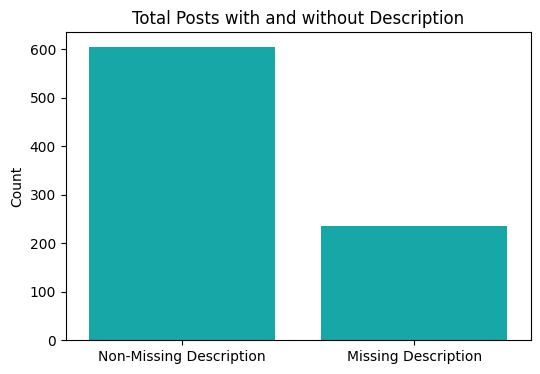

In [53]:
non_missing_count = df['Selftext'].notnull().sum()
missing_count = df['Selftext'].isnull().sum()

# Plot the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=['Non-Missing Description', 'Missing Description'], y=[non_missing_count, missing_count], color = 'c')
plt.title(f'Total Posts with and without Description')
plt.ylabel('Count')
plt.show()

Posts by Day & Time Frequency

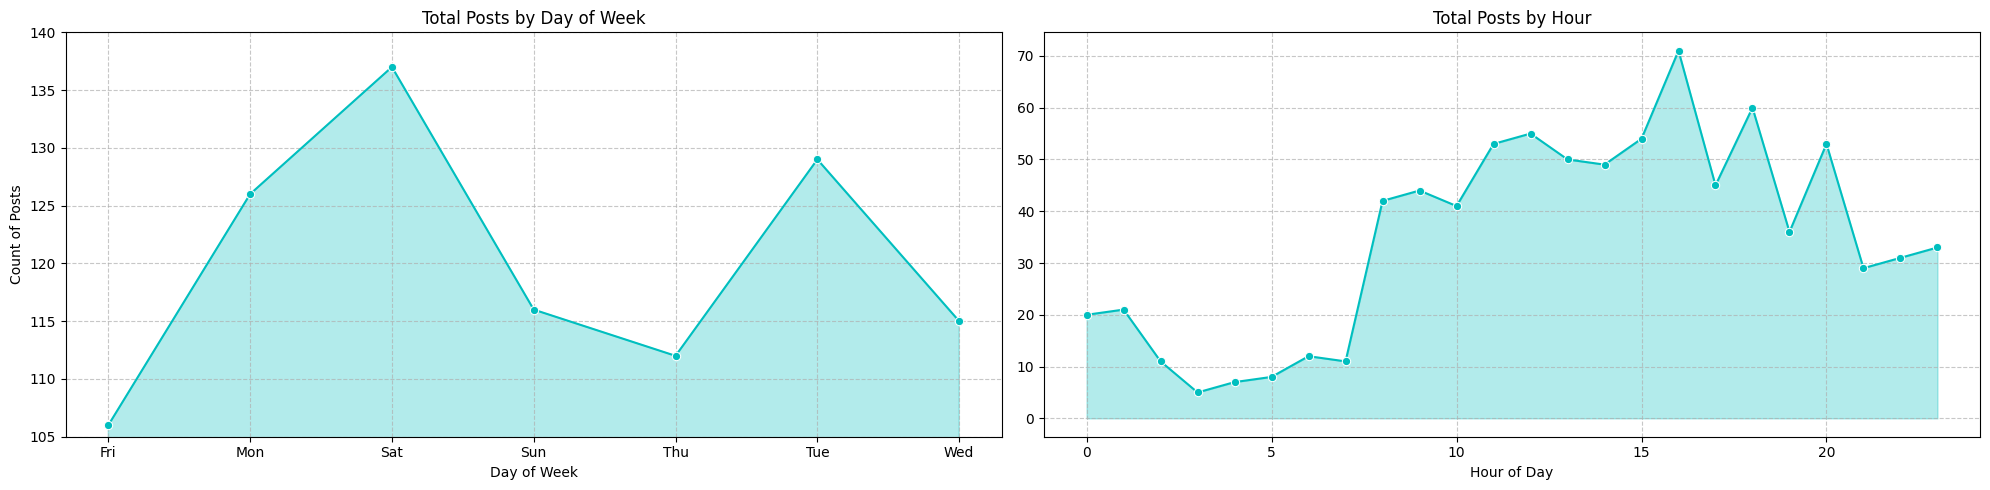

In [45]:
# Add new columns to extract the day and time from the CreatedDate attribute
df['CreatedDay'] = df['CreatedDate'].dt.strftime('%a')
df['CreatedHour'] = df['CreatedDate'].dt.hour

df_day = df.groupby('CreatedDay').size().reset_index(name='Count')
df_hour = df.groupby('CreatedHour').size().reset_index(name = 'Count')

plt.figure(figsize=(20, 5))

# Plot total posts by day of week
plt.subplot(1, 2, 1)
sns.lineplot(data=df_day, x='CreatedDay', y='Count', marker='o', color='c')
plt.fill_between(df_day['CreatedDay'], df_day['Count'], color='c', alpha=0.3)
plt.title('Total Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Posts')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(105, 140)

# Plot total posts by hour
plt.subplot(1, 2, 2)
sns.lineplot(data=df_hour, x='CreatedHour', y='Count', marker='o', color='c')
plt.fill_between(df_hour['CreatedHour'], df_hour['Count'], color='c', alpha=0.3)
plt.title('Total Posts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Most Posts by Author

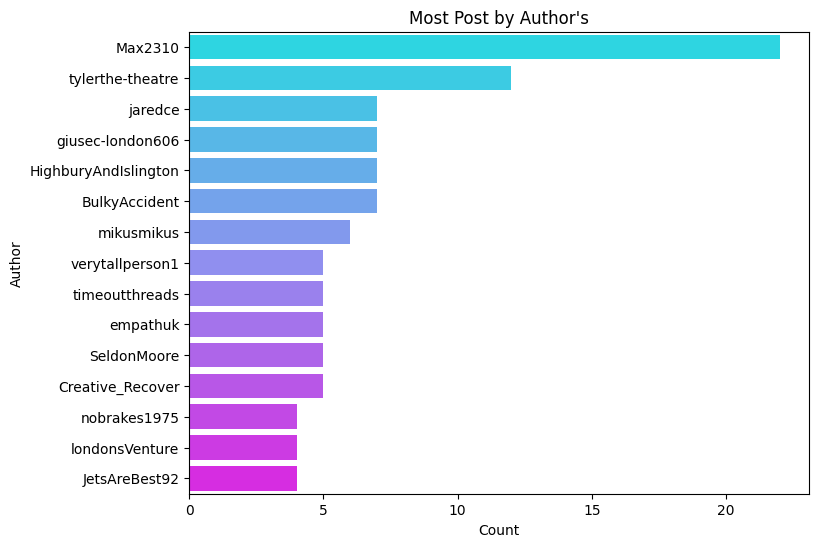

In [57]:
#df = df[df_may['Author'] != 'None'] # Deleted post had None as author
top_author = df['Author'].value_counts().reset_index()
top_author = top_author.head(15).sort_values(['Author','index'], ascending = False)
top_author.columns = ['Author','Count']
plt.figure(figsize=(8,6))
sns.barplot(data = top_author, x = 'Count', y = 'Author', palette = 'cool').set_title("Most Post by Author's")
plt.show()

Popular Post by Upvotes

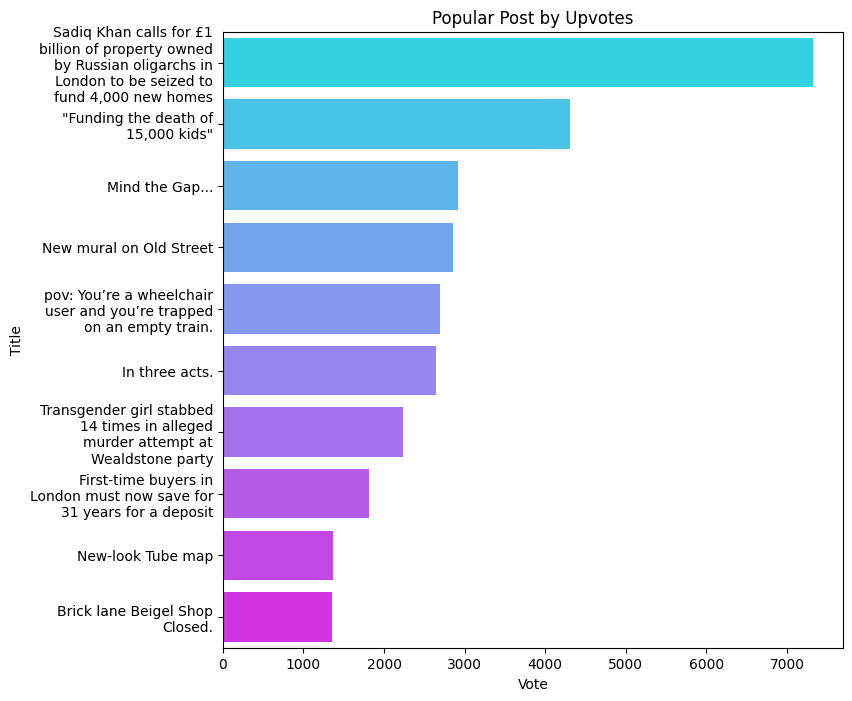

In [59]:
df_com = df.sort_values(by = 'TotalComments', ascending = False).head(10)
df_com = df_com[['Title','Author','TotalComments']]

df_vote = df.sort_values(by = 'Vote', ascending = False).head(10)
df_vote = df_vote[['Title','Author','TotalComments','Vote']]

plt.figure(figsize=(8,8))
ax = sns.barplot(data = df_vote, x = 'Vote' , y = 'Title', palette = 'cool')
new_labels = [textwrap.fill(label, 25) for label in df_vote['Title']]  # Insert line breaks at position 12
ax.set_yticklabels(new_labels)
ax.set_title("Popular Post by Upvotes")
plt.show()

Popular Post by Comments

Text(0.5, 1.0, 'Popular Post by Comments')

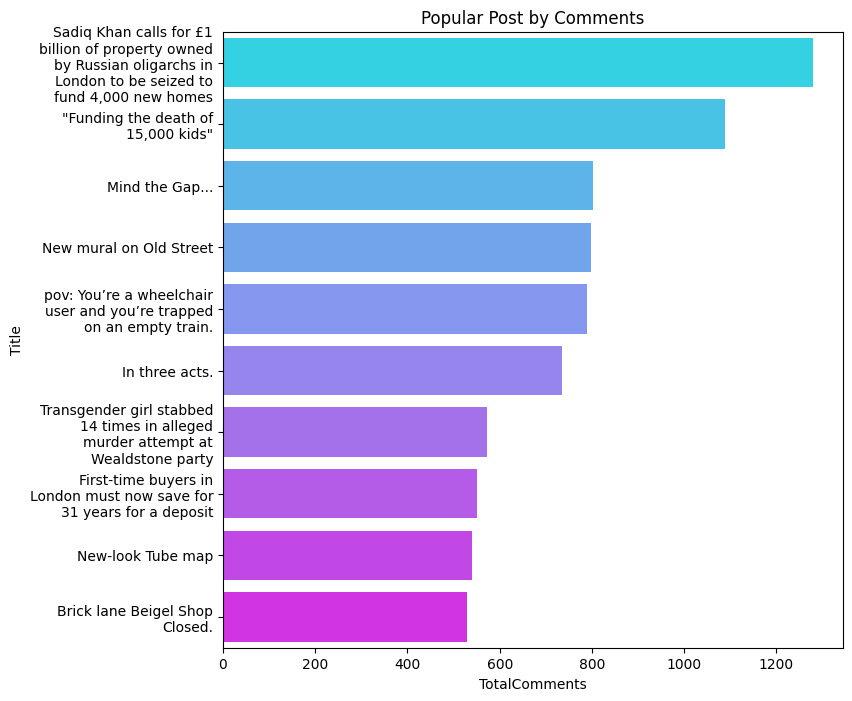

In [61]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data = df_com, x = 'TotalComments' , y = 'Title', palette = 'cool')
new_labels = [textwrap.fill(label, 25) for label in df_vote['Title']]  # Insert line breaks at position 12
ax.set_yticklabels(new_labels)
ax.set_title('Popular Post by Comments')

Word Cloud

In [66]:
import nltk
import string
import warnings
from collections import Counter
from nltk.util import trigrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize,sent_tokenize

df['FullTextTokenize'] = df['FullText'].str.lower().apply(word_tokenize) # tokenize the full text
sw = sw.words('english') # stop words
p = list(string.punctuation) # punctuations
unwanted_words = sw + p

df['FullTextClean'] = df['FullTextTokenize'].apply(lambda x: [word for word in x if word not in unwanted_words])
df_agg  = df.groupby('Subreddit').agg({'FullTextClean': 'sum'}).reset_index()
# Trigrams
freqDict = {}
all_words = df_agg['FullTextClean'].item()
trigram_word = list(trigrams(all_words))
trigram_counts = Counter(trigram_word)
freqDict.update(trigram_counts.most_common(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
freqDict
# width=3456', 'format=pjpg', 'auto=webp' - interesting find ;) - investigate this

{('please', 'let', 'know'): 8,
 ('waltham', 'abbey', 'chingford'): 7,
 ("''", 'say', 'type'): 6,
 ('london', 'anyone', 'know'): 5,
 ('10', 'years', 'ago'): 5,
 ('help', 'would', 'appreciated'): 4,
 ('original', 'wet', 'charcoal'): 4,
 ('wet', 'charcoal', 'pastel'): 4,
 ('charcoal', 'pastel', 'art'): 4,
 ('width=3456', 'format=pjpg', 'auto=webp'): 4}

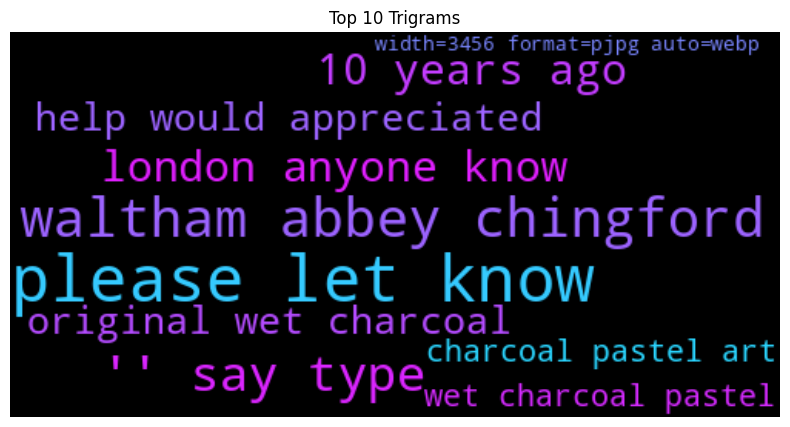

In [68]:
# Word Count
trigrams_str = [' '.join(trigram) for trigram in freqDict.keys()]
wordcloud = WordCloud(width=500, height=250, background_color = 'black', colormap
                      = 'cool').generate_from_frequencies(dict(zip(trigrams_str, freqDict.values())))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Trigrams')
plt.show()